This is Amanda's Jupyter Notebook for EDA performed on 4/10/2025. This work was done before the log_10 transformation was applied to the target variable, and helps to show why this change was necessary. 

In [1]:
## import some packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# load in the data
crashes = pd.read_csv("cbg_no2020_normalized_train.csv")

In [ ]:
# listing our the columns so that I know what I am working with 

crashes.columns

Index(['census_block_group', 'Ac_Total', 'Ac_Water', 'Ac_Land', 'Ac_Unpr',
       'TotPop', 'CountHU', 'HH', 'P_WrkAge', 'AutoOwn0', 'Pct_AO0',
       'AutoOwn1', 'Pct_AO1', 'AutoOwn2p', 'Pct_AO2p', 'Workers',
       'R_LowWageWk', 'R_MedWageWk', 'R_HiWageWk', 'R_PCTLOWWAGE', 'TotEmp',
       'E5_Ret', 'E5_Off', 'E5_Ind', 'E5_Svc', 'E5_Ent', 'E8_Ret', 'E8_off',
       'E8_Ind', 'E8_Svc', 'E8_Ent', 'E8_Ed', 'E8_Hlth', 'E8_Pub',
       'E_LowWageWk', 'E_MedWageWk', 'E_HiWageWk', 'E_PctLowWage', 'D1A',
       'D1B', 'D1C', 'D1C5_RET', 'D1C5_OFF', 'D1C5_IND', 'D1C5_SVC',
       'D1C5_ENT', 'D1C8_RET', 'D1C8_OFF', 'D1C8_IND', 'D1C8_SVC', 'D1C8_ENT',
       'D1C8_ED', 'D1C8_HLTH', 'D1C8_PUB', 'D1D', 'D1_FLAG', 'D2A_JPHH',
       'D2B_E5MIX', 'D2B_E5MIXA', 'D2B_E8MIX', 'D2B_E8MIXA', 'D2A_EPHHM',
       'D2C_TRPMX1', 'D2C_TRPMX2', 'D2C_TRIPEQ', 'D2R_JOBPOP', 'D2R_WRKEMP',
       'D2A_WRKEMP', 'D2C_WREMLX', 'D3A', 'D3AAO', 'D3AMM', 'D3APO', 'D3B',
       'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', '

In [ ]:
# Here I try to make a list for iteration through the columns, but this ended up not working out.

features = list(crashes.columns)
print(features)

['census_block_group', 'Ac_Total', 'Ac_Water', 'Ac_Land', 'Ac_Unpr', 'TotPop', 'CountHU', 'HH', 'P_WrkAge', 'AutoOwn0', 'Pct_AO0', 'AutoOwn1', 'Pct_AO1', 'AutoOwn2p', 'Pct_AO2p', 'Workers', 'R_LowWageWk', 'R_MedWageWk', 'R_HiWageWk', 'R_PCTLOWWAGE', 'TotEmp', 'E5_Ret', 'E5_Off', 'E5_Ind', 'E5_Svc', 'E5_Ent', 'E8_Ret', 'E8_off', 'E8_Ind', 'E8_Svc', 'E8_Ent', 'E8_Ed', 'E8_Hlth', 'E8_Pub', 'E_LowWageWk', 'E_MedWageWk', 'E_HiWageWk', 'E_PctLowWage', 'D1A', 'D1B', 'D1C', 'D1C5_RET', 'D1C5_OFF', 'D1C5_IND', 'D1C5_SVC', 'D1C5_ENT', 'D1C8_RET', 'D1C8_OFF', 'D1C8_IND', 'D1C8_SVC', 'D1C8_ENT', 'D1C8_ED', 'D1C8_HLTH', 'D1C8_PUB', 'D1D', 'D1_FLAG', 'D2A_JPHH', 'D2B_E5MIX', 'D2B_E5MIXA', 'D2B_E8MIX', 'D2B_E8MIXA', 'D2A_EPHHM', 'D2C_TRPMX1', 'D2C_TRPMX2', 'D2C_TRIPEQ', 'D2R_JOBPOP', 'D2R_WRKEMP', 'D2A_WRKEMP', 'D2C_WREMLX', 'D3A', 'D3AAO', 'D3AMM', 'D3APO', 'D3B', 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025', 'D4B050', 'D5AR', 'D5AE', 'D5CR', 'D5CRI', 'D5CE', 'D5CEI', 'D2A_Ranked', 'D2B

In [7]:
## make the model object
crashes_lr = LinearRegression()

## Fit the model
crashes_lr.fit(crashes[['census_block_group', 'E_LowWageWk', 'E_MedWageWk', 'E_HiWageWk', 'E_PctLowWage', 'D1A', 'D1B', 'D1C', 'D3A', 'D3B', 'AutoOwn0', 'NatWalkInd', 'AutoOwn1' ]],
                crashes['normalized_crashes'])

LinearRegression()

In [19]:
features = np.array(['census_block_group', 'E_LowWageWk', 'E_MedWageWk', 'E_HiWageWk', 'E_PctLowWage', 'D1A', 'D1B', 'D1C', 'D3A', 'D3B', 'AutoOwn0', 'NatWalkInd', 'AutoOwn1'])

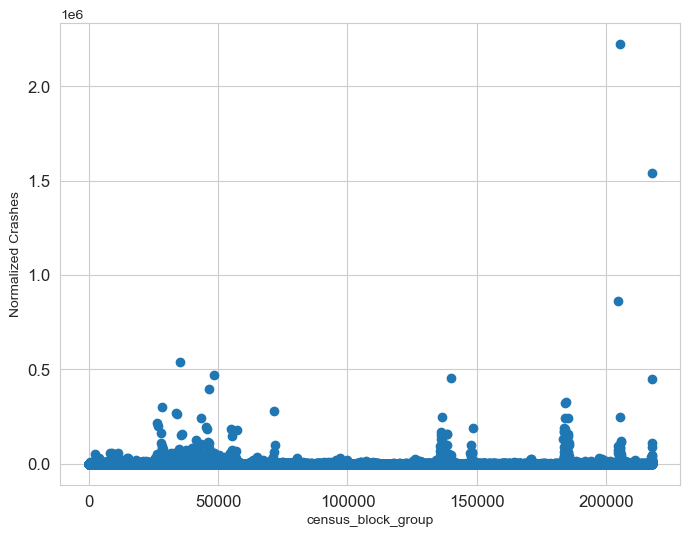

In [ ]:
# Here is an attempt at a scatter plot, which helped me see that population is no longer the variable with the primary impact on 
plt.figure(figsize=(8,6))

plt.scatter(crashes.census_block_group,
            crashes.normalized_crashes)

plt.xlabel(item, fontsize=10)
plt.ylabel("Normalized Crashes", fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

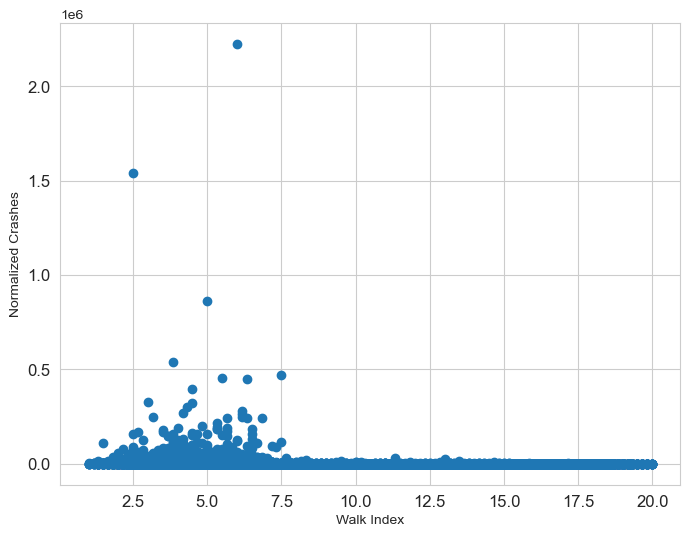

In [61]:
# Walk index vs normalized crashes. There is somehting happening related to lower walk scores => more severe crashes

plt.figure(figsize=(8,6))

plt.scatter(crashes.NatWalkInd,
            crashes.normalized_crashes)

plt.xlabel('Walk Index', fontsize=10)
plt.ylabel("Normalized Crashes", fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

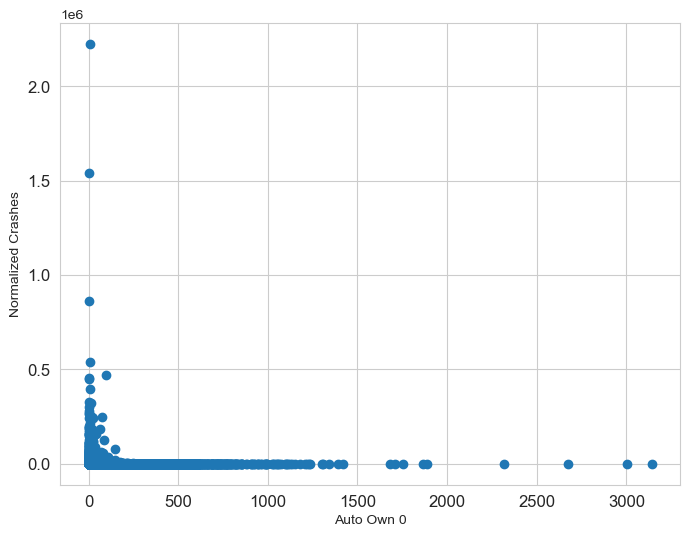

In [62]:
# little revealed by comparing auto ownershiop to crashes

plt.figure(figsize=(8,6))

plt.scatter(crashes.AutoOwn0,
            crashes.normalized_crashes)

plt.xlabel("Auto Own 0", fontsize=10)
plt.ylabel("Normalized Crashes", fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

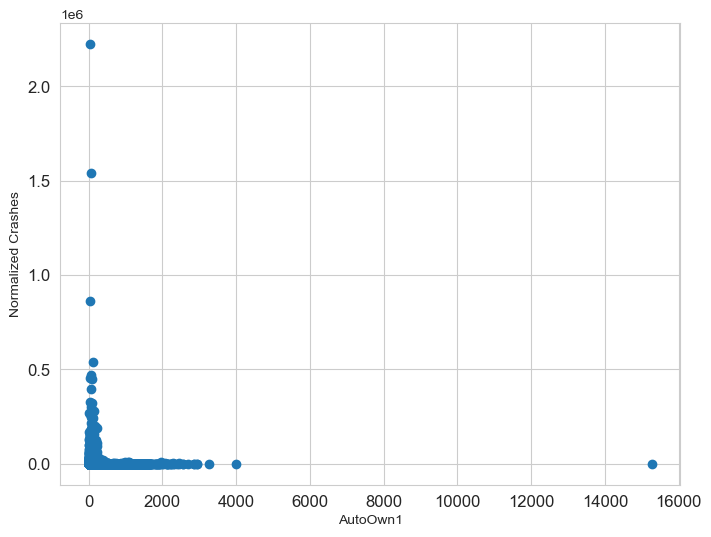

In [63]:
# even less when we look at second (or 2+?) cars - AutoOwn1

plt.figure(figsize=(8,6))

plt.scatter(crashes.AutoOwn1,
            crashes.normalized_crashes)

plt.xlabel('AutoOwn1', fontsize=10)
plt.ylabel("Normalized Crashes", fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

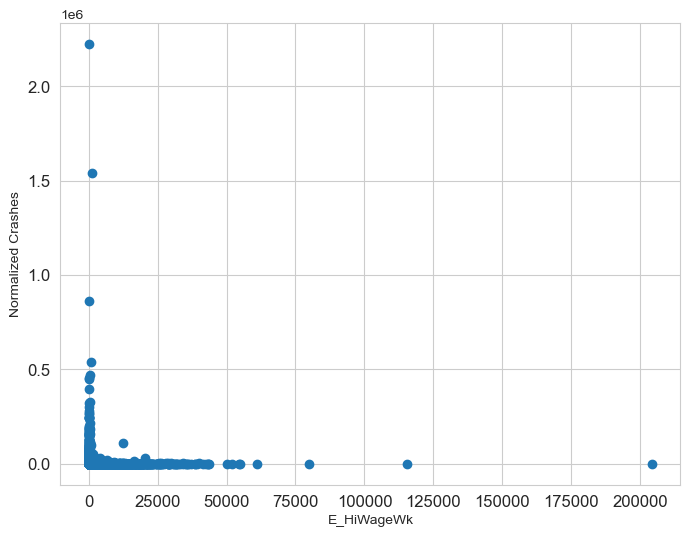

In [ ]:
# no real correlation between high income earners and crashes
plt.figure(figsize=(8,6))

plt.scatter(crashes.E_HiWageWk,
            crashes.normalized_crashes)

plt.xlabel('E_HiWageWk', fontsize=10)
plt.ylabel("Normalized Crashes", fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [64]:
## using Olti's code, I consider some heat maps to quickly see correlations. 

file_path = "cbg_no2020_normalized_train.csv"  # Change this to your actual file path
df = pd.read_csv(file_path, low_memory=False)

<Axes: >

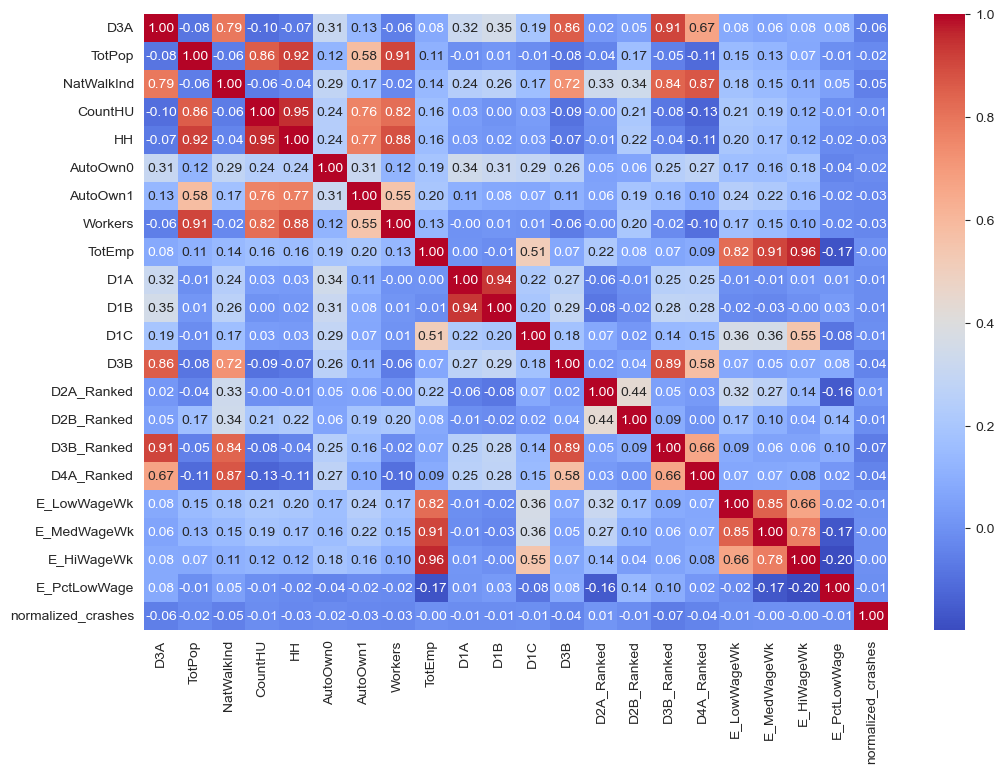

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[['D3A', 'TotPop', 'NatWalkInd', 'CountHU', 'HH', 'AutoOwn0', 'AutoOwn1', 'Workers', 'TotEmp',
          'D1A', 'D1B','D1C', 'D3B', 'D2A_Ranked', 'D2B_Ranked', 'D3B_Ranked', 'D4A_Ranked','E_LowWageWk', 'E_MedWageWk', 'E_HiWageWk', 'E_PctLowWage', 'normalized_crashes']].corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", )


<Axes: >

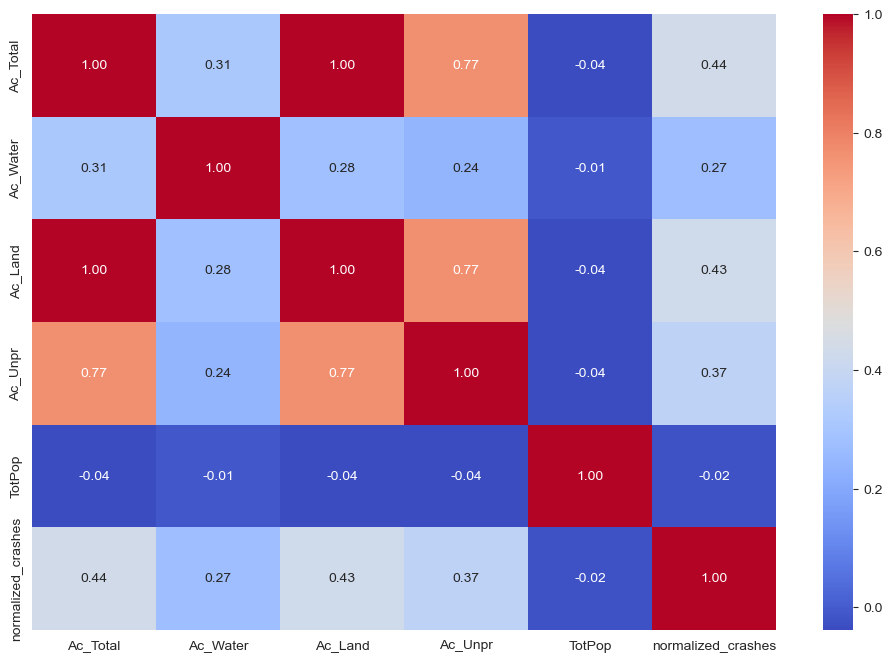

In [39]:
corr = df[['Ac_Total', 'Ac_Water', 'Ac_Land', 'Ac_Unpr',
       'TotPop', 'normalized_crashes']].corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", )

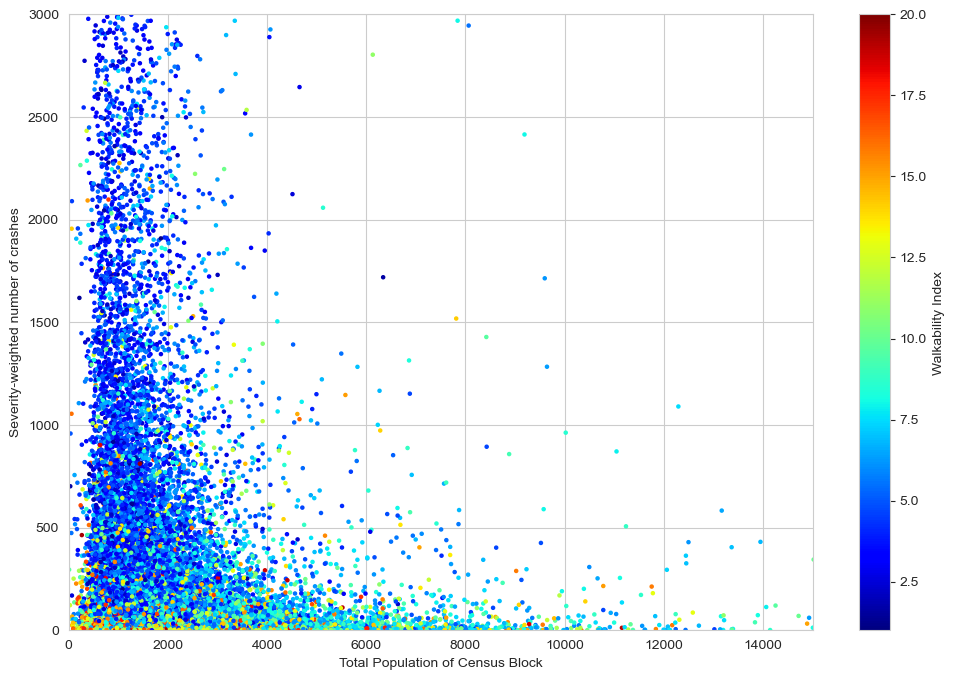

In [65]:
'''
A scatter plot of the crashes vs. total population of the census block,
color-coded by the national walkability index
'''
plt.figure(figsize = (12,8))

plt.scatter(df['TotPop'], df['normalized_crashes'], c = df['NatWalkInd'], s = 5, cmap = 'jet')
plt.colorbar(label='Walkability Index')
plt.xlabel('Total Population of Census Block')
plt.ylabel('Severity-weighted number of crashes')
plt.xlim(0,15000)
plt.ylim(0,3000)
plt.show()

<Axes: >

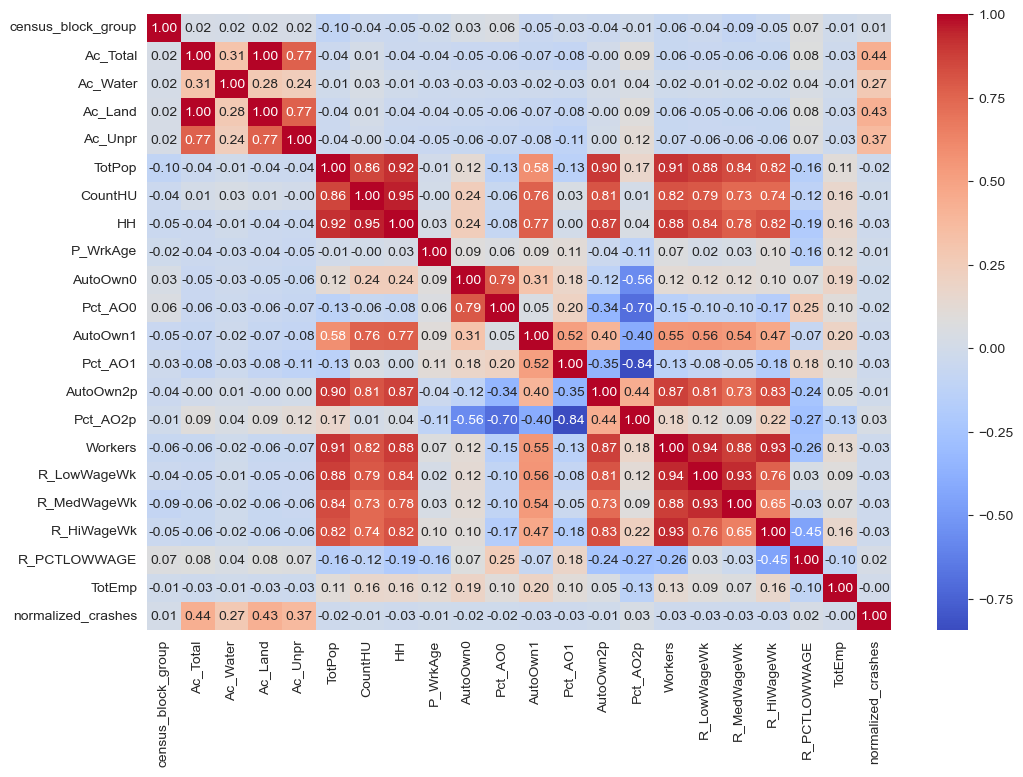

In [42]:
corr = df[['census_block_group', 'Ac_Total', 'Ac_Water', 'Ac_Land', 'Ac_Unpr',
       'TotPop', 'CountHU', 'HH', 'P_WrkAge', 'AutoOwn0', 'Pct_AO0',
       'AutoOwn1', 'Pct_AO1', 'AutoOwn2p', 'Pct_AO2p', 'Workers',
       'R_LowWageWk', 'R_MedWageWk', 'R_HiWageWk', 'R_PCTLOWWAGE', 'TotEmp',
        'normalized_crashes']].corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", )



<Axes: >

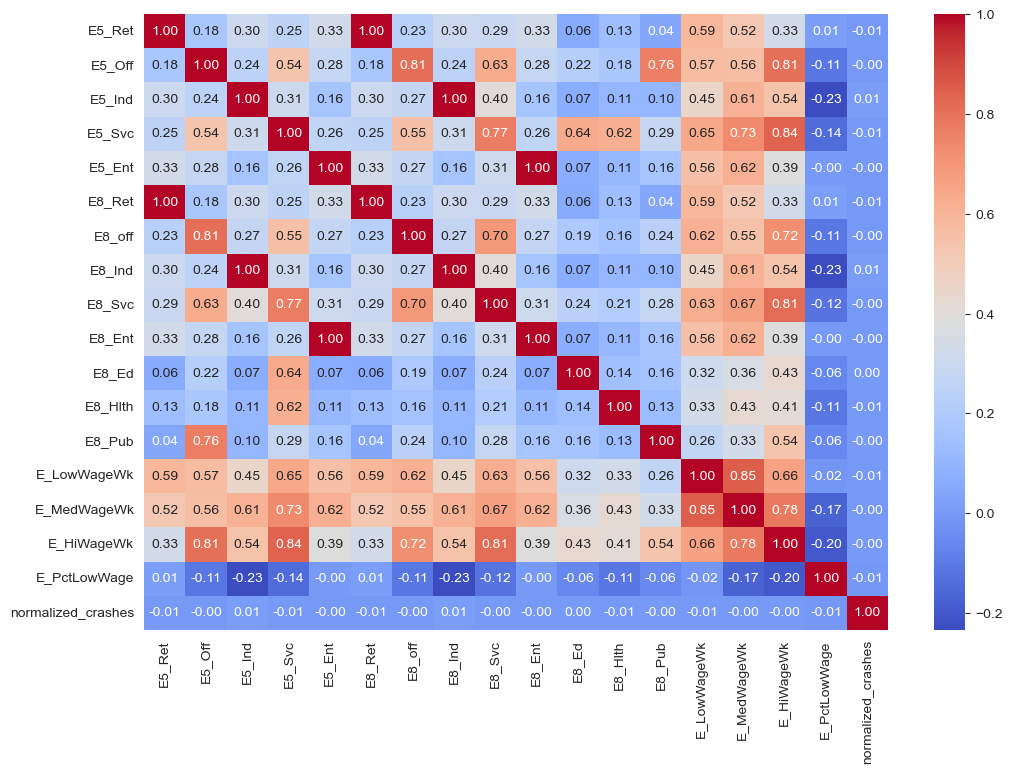

In [44]:
corr = df[[
       'E5_Ret', 'E5_Off', 'E5_Ind', 'E5_Svc', 'E5_Ent', 'E8_Ret', 'E8_off',
       'E8_Ind', 'E8_Svc', 'E8_Ent', 'E8_Ed', 'E8_Hlth', 'E8_Pub',
       'E_LowWageWk', 'E_MedWageWk', 'E_HiWageWk', 'E_PctLowWage', 'normalized_crashes']].corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", )

<Axes: >

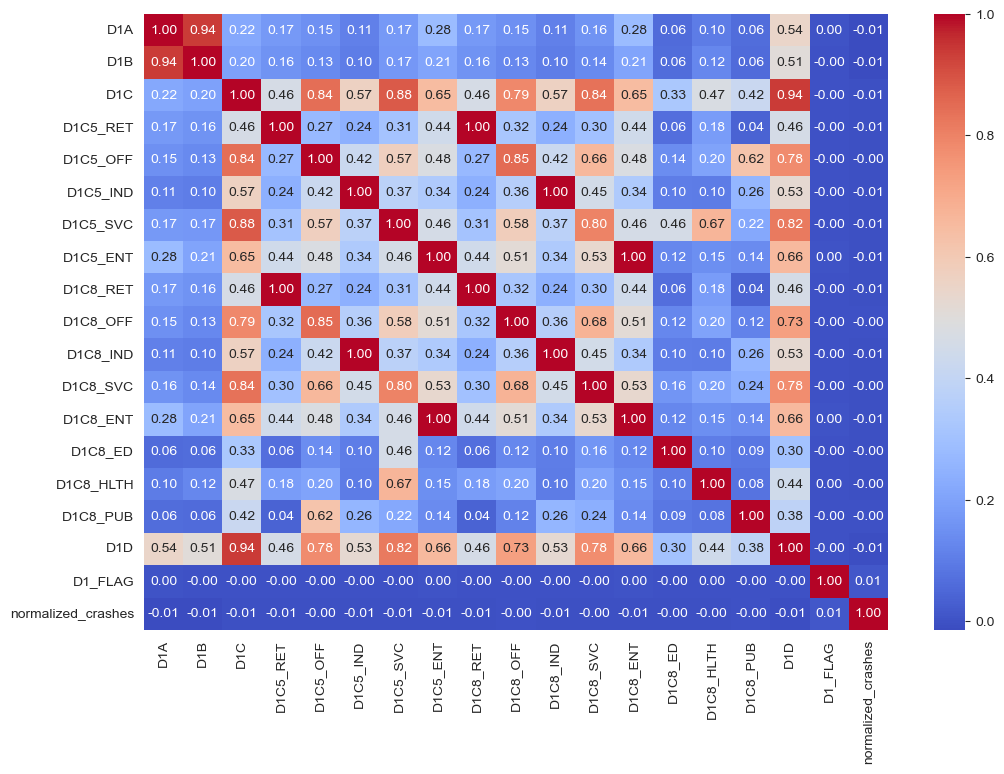

In [45]:
corr = df[['D1A',
       'D1B', 'D1C', 'D1C5_RET', 'D1C5_OFF', 'D1C5_IND', 'D1C5_SVC',
       'D1C5_ENT', 'D1C8_RET', 'D1C8_OFF', 'D1C8_IND', 'D1C8_SVC', 'D1C8_ENT',
       'D1C8_ED', 'D1C8_HLTH', 'D1C8_PUB', 'D1D', 'D1_FLAG', 'normalized_crashes']].corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", )

<Axes: >

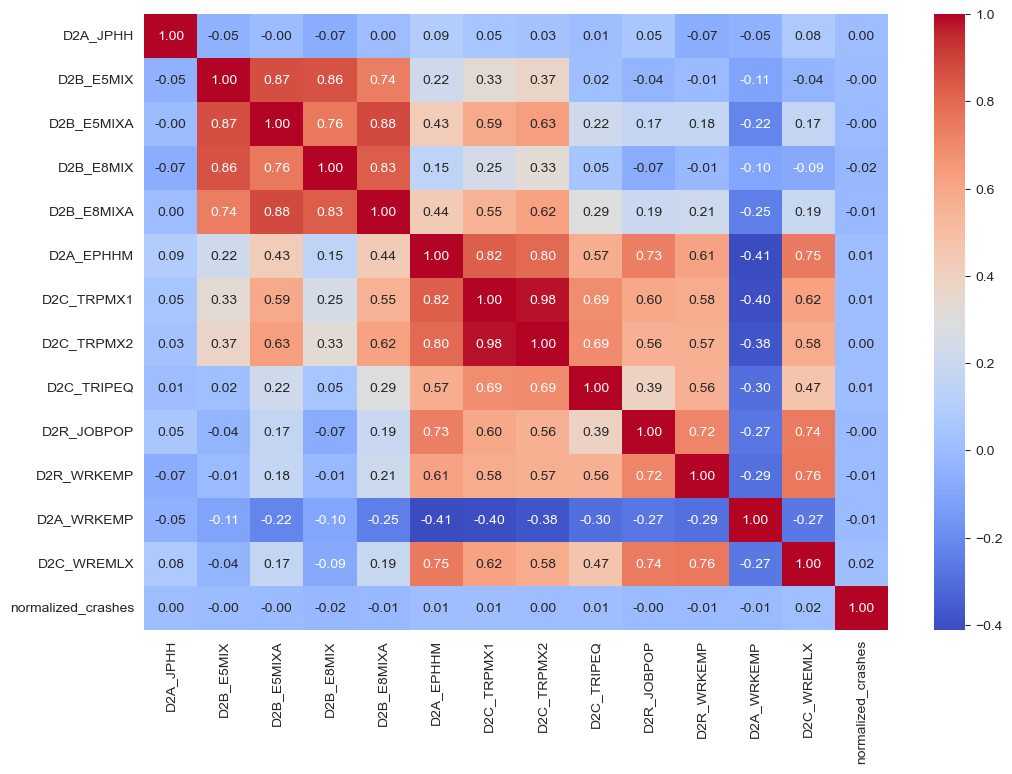

In [47]:
corr = df[['D2A_JPHH',
       'D2B_E5MIX', 'D2B_E5MIXA', 'D2B_E8MIX', 'D2B_E8MIXA', 'D2A_EPHHM',
       'D2C_TRPMX1', 'D2C_TRPMX2', 'D2C_TRIPEQ', 'D2R_JOBPOP', 'D2R_WRKEMP',
       'D2A_WRKEMP', 'D2C_WREMLX', 'normalized_crashes']].corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", )

<Axes: >

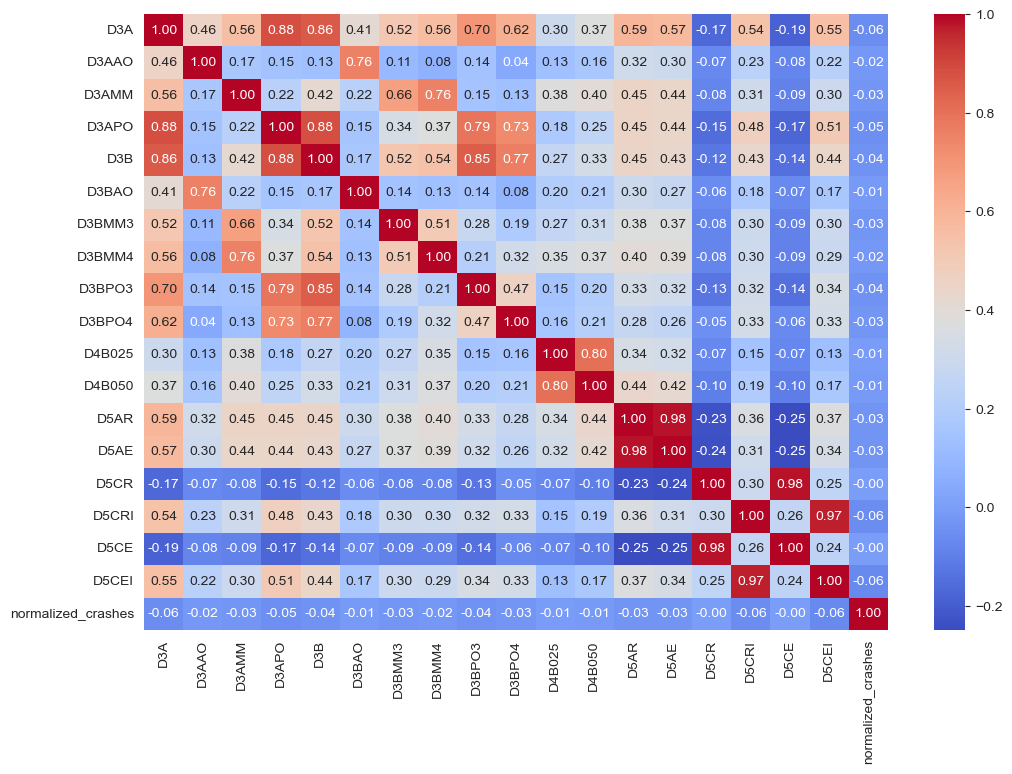

In [49]:
corr = df[['D3A', 'D3AAO', 'D3AMM', 'D3APO', 'D3B',
       'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025', 'D4B050',
       'D5AR', 'D5AE', 'D5CR', 'D5CRI', 'D5CE', 'D5CEI', 'normalized_crashes']].corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", )

<Axes: >

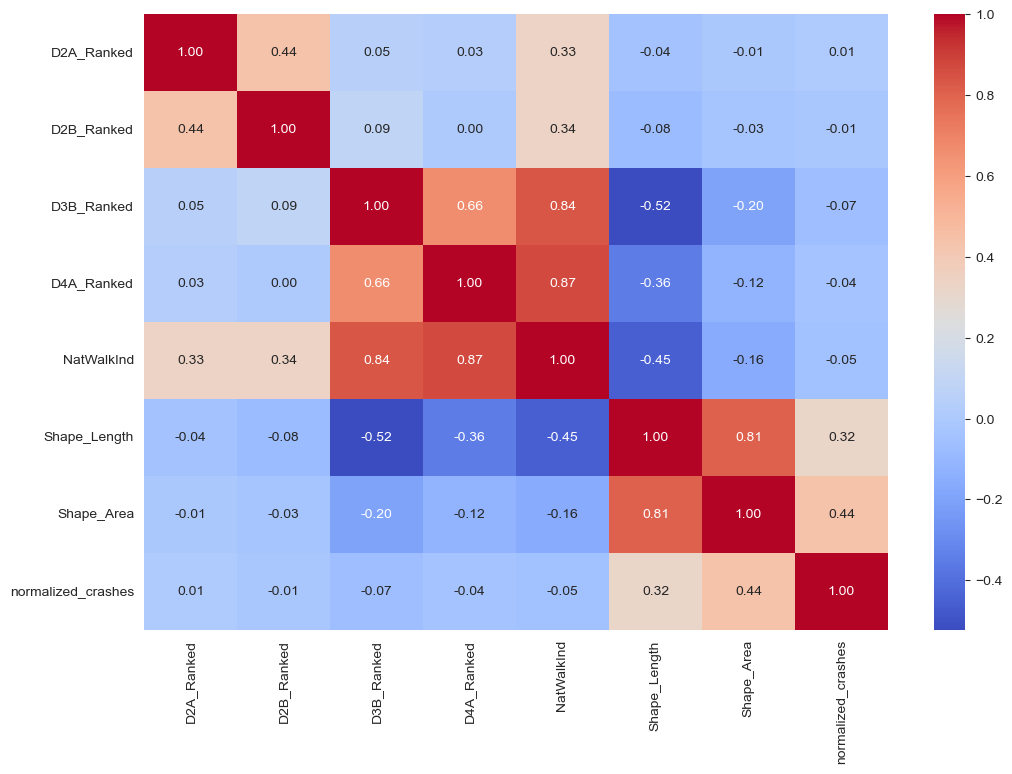

In [50]:
corr = df[['D2A_Ranked',
       'D2B_Ranked', 'D3B_Ranked', 'D4A_Ranked', 'NatWalkInd', 'Shape_Length',
       'Shape_Area', 'normalized_crashes']].corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", )